<a href="https://colab.research.google.com/github/priyadharshini13/data_science/blob/master/2_DataCleaning_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import random

In [62]:
#Read the cleaned dataframe
df = pd.read_parquet('drive/My Drive/CleanedLocationData_1.gzip')
df

UniqueId                                         ColumnName                                  type  Count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In the above 40 columns, some columns are not going to be included in the training as it contains less dataset and more non-english characters
The below columns will be removed.
1. PostBox - only 264
2. AddressLine1 - Non-English characters
3. AddressLine2 - Non-English characters
4. AddressLine3 - Non-English characters
5. AddressLine4 - Non-English characters
6. Email - 625 values
7. PhoneNumberCountryPrefix - 543 values
8. PhoneNumber - 543 values
9. PhoneNumberExtension - 116 values
10. Alternative Name - 3260
11. Mapping valid from - 1940 values
12. Acronym - 1123 values

In [71]:
#Removing above mentioned rows.
df1 = df.drop([5,11,12,22,28,29,30,31,36,37,38,39])
df1  = df1.reset_index()
df1 = df1.drop(['index'],axis=1)
df1

UniqueId                                         ColumnName                                  type  Count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [72]:
#Length after removing 12 columns from 41 columns
len(df1)

29

In [73]:
df1Stats = df1.drop(['UniqueId', 'ColumnName', 'Values', 'Count'], axis=1)
df1Stats

,type,NonEmptyValuesCount
0,organisationID,36739
1,identifierCode,36739
2,mappingCodeSystem,2419
3,mappingCodeSystemName,2419
4,mappingCode,2339
5,categoryClassificationCodeSystemName,36739
6,categoryClassificationCode,36739
7,categoryClassificationName,36739
8,status,36739
9,organisation,36739


In [79]:
#Grouping by type and aggregating values in each type
grouped_byType = df1Stats.groupby('type').agg({'NonEmptyValuesCount':'sum'})
grouped_byType


,NonEmptyValuesCount
type,
City,36565
CountryCode,36738
County,27196
GPSLocation,27625
PostCode,35953
Region,20778
State,22962
categoryClassificationCode,36739
categoryClassificationCodeSystemName,36739


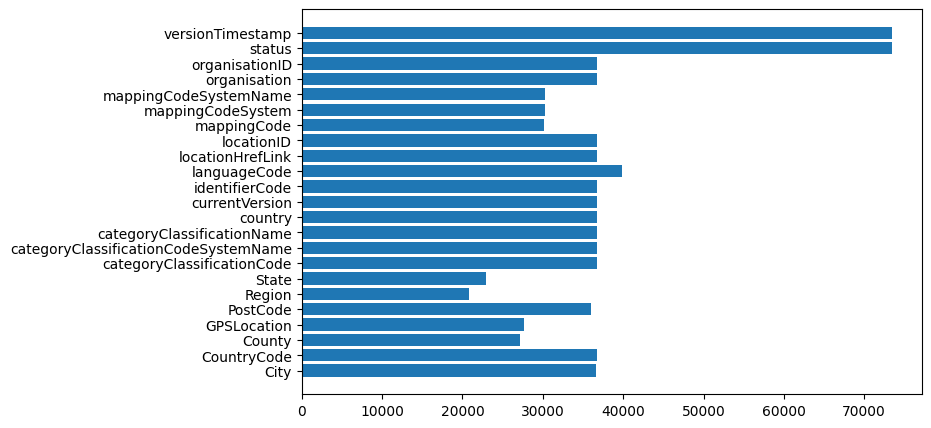

In [76]:
plt.barh(grouped_byType.index,grouped_byType['NonEmptyValuesCount'])
plt.rcParams["figure.figsize"] = (8,5)

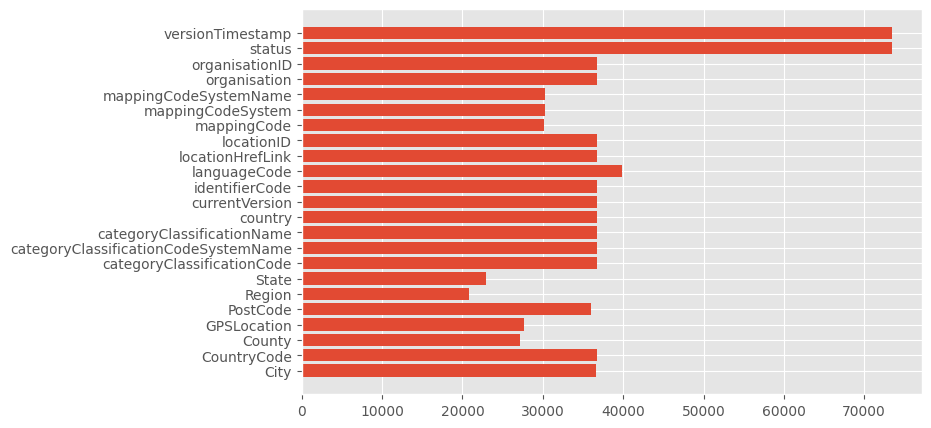

In [80]:
grouped = df1Stats.groupby('type').describe()
grouped


NonEmptyValuesCount                                                                      
                                                   count     mean           std      min       25%      50%       75%      max
type                                                                                                                          
City                                  1.0                 36565.0 NaN            36565.0  36565.00  36565.0  36565.00  36565.0
CountryCode                           1.0                 36738.0 NaN            36738.0  36738.00  36738.0  36738.00  36738.0
County                                1.0                 27196.0 NaN            27196.0  27196.00  27196.0  27196.00  27196.0
GPSLocation                           1.0                 27625.0 NaN            27625.0  27625.00  27625.0  27625.00  27625.0
PostCode                              1.0                 35953.0 NaN            35953.0  35953.00  35953.0  35953.00  35953.0
Region                                1.0                 20778.0 NaN            20778.0  20778.00  20778.0  20778.00  20778.0
State                                 1.0                 22962.0 NaN            22962.0  22962.00  22962.0  22962.00  22962.0
categoryClassificationCode            1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
categoryClassificationCodeSystemName  1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
categoryClassificationName            1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
country                               1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
currentVersion                        1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
identifierCode                        1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
languageCode                          2.0                 19907.5  23803.335575  3076.0   11491.75  19907.5  28323.25  36739.0
locationHrefLink                      1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
locationID                            1.0                 36738.0 NaN            36738.0  36738.00  36738.0  36738.00  36738.0
mappingCode                           2.0                 15092.5  18036.172668  2339.0   8715.75   15092.5  21469.25  27846.0
mappingCodeSystem                     2.0                 15133.0  17980.311232  2419.0   8776.00   15133.0  21490.00  27847.0
mappingCodeSystemName                 2.0                 15133.0  17980.311232  2419.0   8776.00   15133.0  21490.00  27847.0
organisation                          1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
organisationID                        1.0                 36739.0 NaN            36739.0  36739.00  36739.0  36739.00  36739.0
status                                2.0                 36739.0  0.000000      36739.0  36739.00  36739.0  36739.00  36739.0
versionTimestamp                      2.0                 36737.5  0.707107      36737.0  36737.25  36737.5  36737.75  36738.0

In [81]:
stats = grouped['NonEmptyValuesCount']
stats

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
City,1.0,36565.0,NaN,36565.0,36565.00,36565.0,36565.00,36565.0
CountryCode,1.0,36738.0,NaN,36738.0,36738.00,36738.0,36738.00,36738.0
County,1.0,27196.0,NaN,27196.0,27196.00,27196.0,27196.00,27196.0
GPSLocation,1.0,27625.0,NaN,27625.0,27625.00,27625.0,27625.00,27625.0
PostCode,1.0,35953.0,NaN,35953.0,35953.00,35953.0,35953.00,35953.0
Region,1.0,20778.0,NaN,20778.0,20778.00,20778.0,20778.00,20778.0
State,1.0,22962.0,NaN,22962.0,22962.00,22962.0,22962.00,22962.0
categoryClassificationCode,1.0,36739.0,NaN,36739.0,36739.00,36739.0,36739.00,36739.0
categoryClassificationCodeSystemName,1.0,36739.0,NaN,36739.0,36739.00,36739.0,36739.00,36739.0


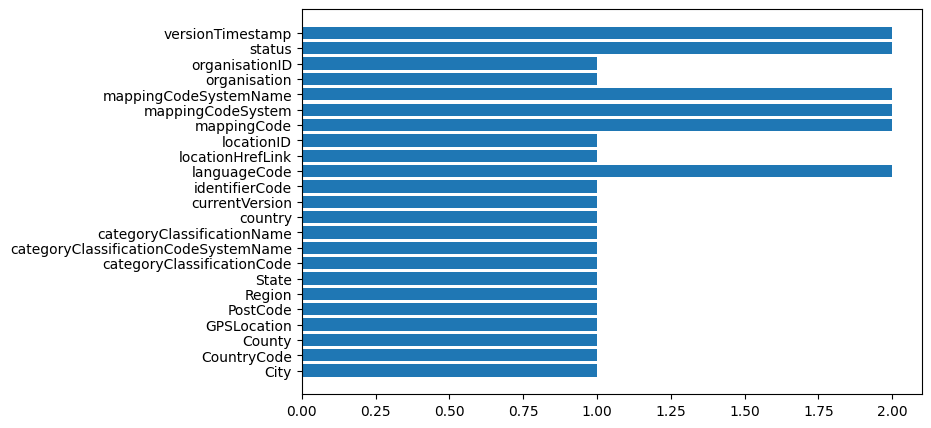

In [11]:
plt.barh(stats.index,stats['count'])
plt.rcParams["figure.figsize"] = (7,4)


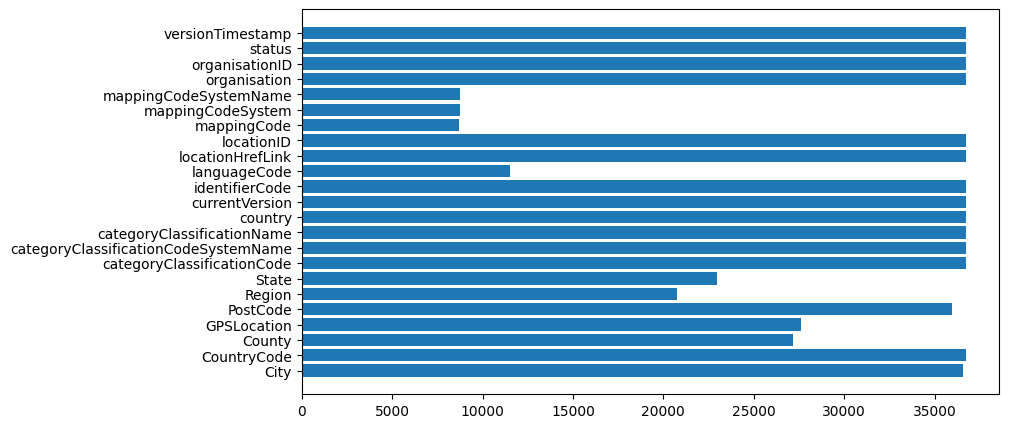

In [16]:
plt.barh(stats.index,stats['25%'])
plt.rcParams["figure.figsize"] = (9,4)

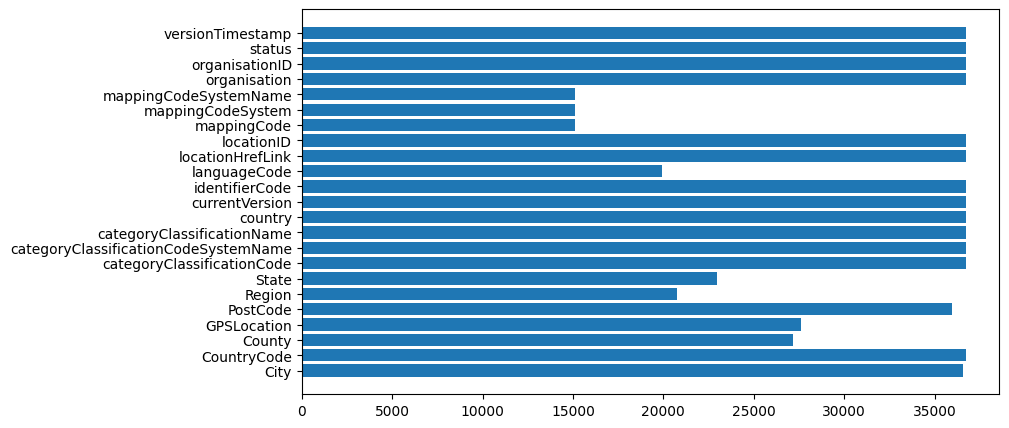

In [19]:
plt.barh(stats.index,stats['50%'])
plt.rcParams["figure.figsize"] = (9,4)


In [85]:
#Group the semantic type values
#mapping code system
mcsValues1 = df1['Values'].values[2]
mcsValues2 =  df1['Values'].values[15]
mcsvalue = np.concatenate((mcsValues1, mcsValues2), axis=0)

mcsnValues1 = df1['Values'].values[3]
mcsnValues2 =  df1['Values'].values[16]
mcsn = np.concatenate((mcsnValues1, mcsnValues2), axis=0)

mcValues1 = df1['Values'].values[4]
mcValues2 =  df1['Values'].values[17]
mc = np.concatenate((mcValues1, mcValues2), axis=0)

status1 = df1['Values'].values[8]
status2 =  df1['Values'].values[18]
status = np.concatenate((status1, status2), axis=0)

timestamp1 = df1['Values'].values[11]
timestamp2 =  df1['Values'].values[28]
timestamp = np.concatenate((timestamp1, timestamp2), axis=0)

langCode1 = df1['Values'].values[10]
langCode2 =  df1['Values'].values[23]
langCode = np.concatenate((langCode1, langCode2), axis=0)

print('mcsvalue',len(mcsvalue))
print('mcsnvalue',len(mcsn))
print('mc',len(mc))
print('status',len(status))
print('timestamp',len(timestamp))
print('langCode',len(langCode))


mcsvalue 73478
mcsnvalue 73478
mc 73478
status 73478
timestamp 73478
langCode 73478


In [86]:
#create new dataframe with only uniqueId, type and values 
df_new = df1.drop(['ColumnName','Count','NonEmptyValuesCount'], axis=1)
df_new = df_new.drop([2,3,4,8,10,11], axis=0)
df_new = df_new.reset_index(drop=True)
df_new

UniqueId                                  type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [24]:
print(mcsvalue)
random.shuffle(mcsvalue)
print(mcsvalue)

#Before shuffle
print('Before shuffle',mcsn)
random.shuffle(mcsn)
print('After shuffle',mcsn)

['200000005700' '200000005700' '200000005700' ... '100000000000' '' '']
['' '100000167429¦100000167429' '' ...
 '100000167429¦100000167429¦200000003444' '' '']
Before shuffle ['EudraVigilance Veterinary Dynamics' 'EudraVigilance Veterinary Dynamics'
 'EudraVigilance Veterinary Dynamics' ... 'European Inspections Database'
 '' '']
After shuffle ['EudraVigilance Human Dynamics' 'European Inspections Database'
 'European Inspections Database' ... 'European Inspections Database' ''
 'European Inspections Database']


In [88]:
import random
#Assigning the aggregated values for repeated columns
columns = ['mcsvalue', 'mcsn', 'mc', 'status', 'timestamp', 'langCode']

#shuffle the values in each aggregated column to have mixed values
for colValues in columns:
  random.shuffle(eval(colValues))

#mappingCodeSystem
df_new['Values'][9] = mcsvalue

#mappingCodeSystemName
df_new['Values'][10] = mcsn

#mappingCode
df_new['Values'][11] = mc

#status
df_new['Values'][12] = status

#timestamp
df_new['Values'][22] = timestamp

#langCode
df_new['Values'][17] = langCode


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/l

In [89]:
#Checking if the values are appended
print(len(df_new['Values'][9]))
print(len(df_new['Values'][10]))
print(len(df_new['Values'][11]))
print(len(df_new['Values'][12]))
print(len(df_new['Values'][22]))
print(len(df_new['Values'][17]))



73478
73478
73478
73478
73478
73478


In [90]:
#Renaming the column values for few columns

#Postcode
df_new['type'][13] = 'postCode'

#CountryCode
df_new['type'][14] = 'countryCode'

#CountryCode
df_new['type'][16] = 'gpsLocation'

#CountryCode
df_new['type'][18] = 'city'

#CountryCode
df_new['type'][19] = 'state'

#CountryCode
df_new['type'][20] = 'region'

#CountryCode
df_new['type'][21] = 'county'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lo

In [91]:
df_new

UniqueId                                  type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [94]:
for i in range(5):
  x = df_new['Values'][i]
  unique, counts = np.unique(x, return_counts=True)
  print(np.asarray((unique, counts)).T)
  # data  = []
  # row = {'Value':unique, 'Count':counts}
  # data.append(row)
  # valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
  # display(valueCountDf)

[['ORG-100000000' 1]
 ['ORG-100000001' 14]
 ['ORG-100000002' 4]
 ...
 ['ORG-100026400' 1]
 ['ORG-100026401' 1]
 ['ORG-100026402' 1]]
[['ORG-100000000' 1]
 ['ORG-100000002' 4]
 ['ORG-100000004' 2]
 ...
 ['ORQ-100013820¦ORG-100026399' 1]
 ['ORQ-100013823¦ORG-100026402' 1]
 ['ORQ-100013831¦ORG-100026400' 1]]
[['Size¦Size¦Type¦Type' 115]
 ['Size¦Type¦Size¦Type' 23]
 ['Size¦Type¦Type' 15]
 ['Size¦Type¦Type¦Size' 41]
 ['Type' 759]
 ['Type¦Size' 1]
 ['Type¦Size¦Size¦Type' 318]
 ['Type¦Size¦Type' 11]
 ['Type¦Size¦Type¦Size' 111]
 ['Type¦Type' 33878]
 ['Type¦Type¦Size' 19]
 ['Type¦Type¦Size¦Size' 1300]
 ['Type¦Type¦Size¦Size¦Size' 3]
 ['Type¦Type¦Type' 62]
 ['Type¦Type¦Type¦Size¦Size' 4]
 ['Type¦Type¦Type¦Type' 78]
 ['Type¦Type¦Type¦Type¦Type¦Type¦Type¦Type' 1]]
[['200000000000' 759]
 ['200000000075¦200000000076' 1]
 ['200000000075¦200000000078' 1]
 ['200000000075¦200000000079' 2]
 ['200000000075¦200000000079¦200000000080¦200000000081' 2]
 ['200000000075¦200000000080' 1]
 ['200000000075¦2000000

In [95]:
x = df_new['Values'][0]
unique, counts = np.unique(x, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf, valueCountDf.describe())

,Value,Count
0,ORG-100000000,1
1,ORG-100000001,14
2,ORG-100000002,4
3,ORG-100000003,3
4,ORG-100000004,2
...,...,...
24592,ORG-100026398,1
24593,ORG-100026399,1
24594,ORG-100026400,1
24595,ORG-100026401,1


,Count
count,24597.000000
mean,1.493637
std,1.925873
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,142.000000


In [96]:
x = df_new['Values'][1]
unique, counts = np.unique(x, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf, valueCountDf.describe())

,Value,Count
0,ORG-100000000,1
1,ORG-100000002,4
2,ORG-100000004,2
3,ORG-100000005,2
4,ORG-100000008,2
...,...,...
24592,ORQ-100013784¦ORG-100026401,1
24593,ORQ-100013795¦ORG-100026393,1
24594,ORQ-100013820¦ORG-100026399,1
24595,ORQ-100013823¦ORG-100026402,1


,Count
count,24597.000000
mean,1.493637
std,1.925873
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,142.000000


In [97]:
#categoryClassificationCodeSystemName
x = df_new['Values'][2]
unique, counts = np.unique(x, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

,Value,Count
0,Size¦Size¦Type¦Type,115
1,Size¦Type¦Size¦Type,23
2,Size¦Type¦Type,15
3,Size¦Type¦Type¦Size,41
4,Type,759
5,Type¦Size,1
6,Type¦Size¦Size¦Type,318
7,Type¦Size¦Type,11
8,Type¦Size¦Type¦Size,111
9,Type¦Type,33878


,Count
count,17.000000
mean,2161.117647
std,8180.492061
min,1.000000
25%,11.000000
50%,41.000000
75%,115.000000
max,33878.000000


In [98]:
# categoryClassificationCode
x = df_new['Values'][3]
unique, counts = np.unique(x, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

,Value,Count
0,200000000000,759
1,200000000075¦200000000076,1
2,200000000075¦200000000078,1
3,200000000075¦200000000079,2
4,200000000075¦200000000079¦200000000080¦200000000081,2
...,...,...
120,200000000093¦200000000080¦200000000081¦200000000092,2
121,200000000093¦200000000080¦200000000092¦200000000081,2
122,200000000093¦200000000092¦200000000080¦200000000081,1
123,200000000094¦200000000080¦200000000081¦200000000092,1


,Count
count,125.000000
mean,293.912000
std,2455.091113
min,1.000000
25%,1.000000
50%,4.000000
75%,28.000000
max,27195.000000


In [99]:
#categoryClassificationName
x = df_new['Values'][4]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

[['EEA National Competent authority¦Regulatory Authority' 65]
 ['EU Institution/Body/Agency' 1]
 ['EU Institution/Body/Agency¦Regulatory Authority' 28]
 ['Educational Institution' 311]
 ['Educational Institution¦Health care' 1]
 ['Educational Institution¦Hospital/Clinic/Other health care facility' 1]
 ['Educational Institution¦Industry' 1]
 ['Educational Institution¦Industry¦Pharmaceutical company' 11]
 ['Educational Institution¦Laboratory/Research/Testing facility' 2]
 ['Educational Institution¦Laboratory/Research/Testing facility¦Industry¦Pharmaceutical company'
  2]
 ['Educational Institution¦Not-for-profit' 1]
 ['Educational Institution¦Pharmaceutical company' 1]
 ['Health care' 1]
 ['Health care¦Hospital/Clinic/Other health care facility' 1357]
 ['Health care¦Hospital/Clinic/Other health care facility¦Industry¦Pharmaceutical company'
  17]
 ['Health care¦Hospital/Clinic/Other health care facility¦SME¦Micro' 1]
 ['Health care¦Industry' 1]
 ['Health care¦Industry¦Pharmaceutical comp

,Value,Count
0,EEA National Competent authority¦Regulatory Authority,65
1,EU Institution/Body/Agency,1
2,EU Institution/Body/Agency¦Regulatory Authority,28
3,Educational Institution,311
4,Educational Institution¦Health care,1
...,...,...
127,SME¦Pharmaceutical company¦Small¦Industry,5
128,SME¦Small¦Industry¦Pharmaceutical company,33
129,SME¦Small¦Pharmaceutical company¦Industry,5
130,Small¦Industry¦Pharmaceutical company¦SME,1


,Count
count,132.000000
mean,278.325758
std,2388.993967
min,1.000000
25%,1.000000
50%,4.000000
75%,28.500000
max,27195.000000


In [176]:
#Organisation
z = df_new['Values'][5]
unique, counts = np.unique(z, return_counts=True)
print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())


[['#NAME?' 2]
 ['1 0 1 Carefarm GmbH' 1]
 ['1 A Pharma GmbH' 2]
 ...
 ['Οrpha-Devel Handels und Vertriebs GmbH' 1]
 ['Τhespis Pharmaceutical Limited' 1]
 ['Медekо Komepc ЕООД' 1]]


,Value,Count
0,#NAME?,2
1,1 0 1 Carefarm GmbH,1
2,1 A Pharma GmbH,2
3,1. Lékárenská Kyjov s.r.o.,1
4,12/14 PHARMACY LIMITED,1
...,...,...
24321,ΙΦΕΤ Α.Ε.,1
24322,ΝΕΣΤΟΡΑΣ ΒΛΑΧΟΣ I.K.E.,1
24323,Οrpha-Devel Handels und Vertriebs GmbH,1
24324,Τhespis Pharmaceutical Limited,1


,Count
count,24326.000000
mean,1.510277
std,1.974794
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,142.000000


In [185]:
arr = df_new['Values'][5]
print(len(arr))
torem = ['#NAME?','Медekо Komepc ЕООД','Lékárenská Kyjov s.r.o',
'ΙΦΕΤ Α.Ε.',
'ΝΕΣΤΟΡΑΣ ΒΛΑΧΟΣ I.K.E.	'
'Медekо Komepc ЕООД	']
arr = arr[ ~np.isin(arr, torem) ]
print(len(arr))
df_new['Values'][5] = arr

36739
36735


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [102]:
#locationID
print(df_new['type'][6])
x = df_new['Values'][6]
unique, counts = np.unique(x, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

locationID


,Value,Count
0,,1
1,Τεχνολογίας & Ασφάλειας,1
2,LOC-100000000,1
3,LOC-100000001,1
4,LOC-100000002,1
...,...,...
36734,LOC-100039797,1
36735,LOC-100039798,1
36736,LOC-100039799,1
36737,LOC-100039800,1


,Count
count,36739.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [104]:
#Removing non-english word
#Cleaning dirty data
index = np.argwhere(x==" Τεχνολογίας & Ασφάλειας")
df_new['Values'][6] = np.delete(df_new['Values'][6], index)
unique, counts = np.unique(y, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Value,Count
0,,1
1,LOC-100000000,1
2,LOC-100000001,1
3,LOC-100000002,1
4,LOC-100000003,1
...,...,...
36733,LOC-100039797,1
36734,LOC-100039798,1
36735,LOC-100039799,1
36736,LOC-100039800,1


,Count
count,36738.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [105]:
#locationHrefLink
print(df_new['type'][7])
x = df_new['Values'][7]
unique, counts = np.unique(x, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

locationHrefLink


,Value,Count
0,"Εργαστήριο Ραδιοϊσοτόπων - Ραδιοφαρμάκων¦ΕΘΝΙΚΟ ΚΕΝΤΡΟ ΕΡΕΥΝΑΣ ΦΥΣΙΚΩΝ ΕΠΙΣΤΗΜΩΝ ""ΔΗΜΟΚΡΙΤΟΣ""",1
1,2019-09-16T11:57:31.632+02:00,1
2,https://spor.ema.europa.eu/v1/locations/LOC-100000000,1
3,https://spor.ema.europa.eu/v1/locations/LOC-100000001,1
4,https://spor.ema.europa.eu/v1/locations/LOC-100000002,1
...,...,...
36734,https://spor.ema.europa.eu/v1/locations/LOC-100039797,1
36735,https://spor.ema.europa.eu/v1/locations/LOC-100039798,1
36736,https://spor.ema.europa.eu/v1/locations/LOC-100039799,1
36737,https://spor.ema.europa.eu/v1/locations/LOC-100039800,1


,Count
count,36739.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [107]:
#Cleaning dirty data
x = df_new['Values'][7]
index = np.argwhere(x==' Εργαστήριο Ραδιοϊσοτόπων - Ραδιοφαρμάκων¦ΕΘΝΙΚΟ ΚΕΝΤΡΟ ΕΡΕΥΝΑΣ ΦΥΣΙΚΩΝ ΕΠΙΣΤΗΜΩΝ "ΔΗΜΟΚΡΙΤΟΣ"')
df_new['Values'][7] = np.delete(df_new['Values'][7], index)
index1 = np.argwhere(df_new['Values'][7]=="2019-09-16T11:57:31.632+02:00")
df_new['Values'][7] = np.delete(df_new['Values'][7], index1)
# print(df_new['Values'][7]=='')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
unique, counts = np.unique(df_new['Values'][7], return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

,Value,Count
0,https://spor.ema.europa.eu/v1/locations/LOC-100000000,1
1,https://spor.ema.europa.eu/v1/locations/LOC-100000001,1
2,https://spor.ema.europa.eu/v1/locations/LOC-100000002,1
3,https://spor.ema.europa.eu/v1/locations/LOC-100000003,1
4,https://spor.ema.europa.eu/v1/locations/LOC-100000004,1
...,...,...
36732,https://spor.ema.europa.eu/v1/locations/LOC-100039797,1
36733,https://spor.ema.europa.eu/v1/locations/LOC-100039798,1
36734,https://spor.ema.europa.eu/v1/locations/LOC-100039799,1
36735,https://spor.ema.europa.eu/v1/locations/LOC-100039800,1


,Count
count,36737.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [109]:
#currentVersion
print(df_new['type'][8])
x = df_new['Values'][8]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)


currentVersion
[[' Ινστιτούτο Πυρηνικών & Ραδιολογικών Επιστημών' 1]
 ['LOC-100014415' 1]
 ['Y' 36737]]


In [110]:

#Cleaning dirty data
index = np.argwhere(x==" Ινστιτούτο Πυρηνικών & Ραδιολογικών Επιστημών")
y = np.delete(df_new['Values'][8], index)
index = np.argwhere(y=='LOC-100014415')
df_new['Values'][8] = np.delete(y, index)
unique, counts = np.unique(y, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Value,Count
0,LOC-100014415,1
1,Y,36737


,Count
count,2.000000
mean,18369.000000
std,25976.274714
min,1.000000
25%,9185.000000
50%,18369.000000
75%,27553.000000
max,36737.000000


In [50]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
#mappingCodeSystem
print(df_new['type'][9])
x = df_new['Values'][9]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

mappingCodeSystem
[['' 43212]
 [' Ενέργειας ' 1]
 ['100000000000' 11195]
 ...
 ['200000005700' 479]
 ['200000005700¦200000005700' 9]
 ['https://spor.ema.europa.eu/v1/locations/LOC-100014415' 1]]


,Value,Count
0,,43212
1,Ενέργειας,1
2,100000000000,11195
3,100000075665¦100000075665,105
4,100000075665¦100000075665¦100000075665,11
...,...,...
497,200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦100000075665¦100000075665,1
498,200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444,1
499,200000005700,479
500,200000005700¦200000005700,9


,Count
count,502.000000
mean,146.370518
std,2016.528077
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,43212.000000


In [118]:
#Cleaning dirty data
x = df_new['Values'][9]
index = np.argwhere(x==' Ενέργειας ')
y = np.delete(df_new['Values'][9], index)
index = np.argwhere(y=='https://spor.ema.europa.eu/v1/locations/LOC-100014415')
df_new['Values'][9] = np.delete(y, index)
unique, counts = np.unique(df_new['Values'][9], return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Value,Count
0,,43212
1,100000000000,11195
2,100000075665¦100000075665,105
3,100000075665¦100000075665¦100000075665,11
4,100000075665¦100000075665¦100000075665¦100000075665,4
...,...,...
495,200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦100000075665,1
496,200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦100000075665¦100000075665,1
497,200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444¦200000003444,1
498,200000005700,479


,Count
count,500.000000
mean,146.952000
std,2020.544131
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,43212.000000


In [119]:
#mappingCodeSystemName
print(df_new['type'][10])
x = df_new['Values'][10]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

mappingCodeSystemName
[['' 43212]
 [' Τεχνολογίας & Ασφάλειας' 1]
 ['Dun & Bradstreet’s Data Universal Numbering System' 174]
 ...
 ['Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦European Inspections Database'
  1]
 ['GS1 Global Location Number' 9]
 ['Y' 1]]


,Value,Count
0,,43212
1,Τεχνολογίας & Ασφάλειας,1
2,Dun & Bradstreet’s Data Universal Numbering System,174
3,Dun & Bradstreet’s Data Universal Numbering System¦EudraVigilance Human Dynamics,1
4,Dun & Bradstreet’s Data Universal Numbering System¦EudraVigilance Human Dynamics¦EudraVigilance Human Dynamics¦Extended EudraVigilance Medicinal Product Dictionary,1
...,...,...
500,Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦European Inspections Database,2
501,Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary,4
502,Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦European Inspections Database,1
503,GS1 Global Location Number,9


,Count
count,505.000000
mean,145.500990
std,1995.416983
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,43212.000000


In [121]:
#Cleaning dirty data
x = df_new['Values'][10]
index = np.argwhere(x==' Τεχνολογίας & Ασφάλειας')
y = np.delete(df_new['Values'][10], index)
index = np.argwhere(y=='Y')
df_new['Values'][10] = np.delete(y, index)
unique, counts = np.unique(df_new['Values'][10], return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Value,Count
0,,43212
1,Dun & Bradstreet’s Data Universal Numbering System,174
2,Dun & Bradstreet’s Data Universal Numbering System¦EudraVigilance Human Dynamics,1
3,Dun & Bradstreet’s Data Universal Numbering System¦EudraVigilance Human Dynamics¦EudraVigilance Human Dynamics¦Extended EudraVigilance Medicinal Product Dictionary,1
4,Dun & Bradstreet’s Data Universal Numbering System¦European Inspections Database,65
...,...,...
498,Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦EudraVigilance Human Dynamics¦EudraVigilance Human Dynamics¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary,1
499,Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦European Inspections Database,2
500,Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary,4
501,Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦Extended EudraVigilance Medicinal Product Dictionary¦European Inspections Database,1


,Count
count,503.000000
mean,146.075547
std,1999.367080
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,43212.000000


In [126]:
#mappingCode
print(df_new['type'][11])
x = df_new['Values'][11]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)

mappingCode
[['' 43293]
 [' Εργαστήριο Ραδιοϊσοτόπων - Ραδιοφαρμάκων"' 1]
 ['00-821-0044' 1]
 ...
 ['ViAd Pharma ApS' 1]
 ['Vivet Therapeutics' 1]
 ['ZOTAL1909' 1]]


In [127]:
#Cleaning dirty data
x = df_new['Values'][11]
index = np.argwhere(x==' Εργαστήριο Ραδιοϊσοτόπων - Ραδιοφαρμάκων"')
df_new['Values'][11] = np.delete(df_new['Values'][11], index)
unique, counts = np.unique(df_new['Values'][11], return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Value,Count
0,,43293
1,00-821-0044,1
2,001381345¦10430,1
3,003237963¦18178,1
4,01-486-1932,1
...,...,...
28988,VETXXP,3
28989,VPZVA2006,1
28990,ViAd Pharma ApS,1
28991,Vivet Therapeutics,1


,Count
count,28993.000000
mean,2.534301
std,254.250233
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,43293.000000


In [128]:
#status
print(df_new['type'][12])
x = df_new['Values'][12]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)

status
[['ACTIVE' 73474]
 ['European Inspections Database¦EudraVigilance Human Dynamics¦European Inspections Database'
  1]
 ['INACTIVE' 1]
 ['PROVISIONAL' 1]
 ['¦' 1]]


In [129]:
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
valueCountDf

,Value,Count
0,ACTIVE,73474
1,European Inspections Database¦EudraVigilance Human Dynamics¦European Inspections Database,1
2,INACTIVE,1
3,PROVISIONAL,1
4,¦,1


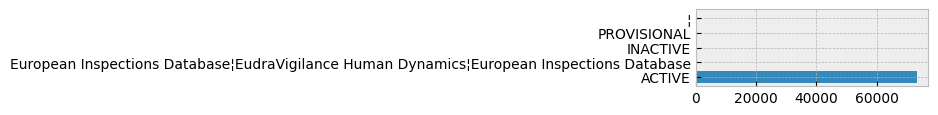

In [137]:
plt.barh(unique,counts)
plt.rcParams["figure.figsize"] = (3,1)
plt.style.use('bmh')

In [ ]:
# Removing dirty data
index = np.argwhere(x=="European Inspections Database¦EudraVigilance Human Dynamics¦European Inspections Database")
df_new['Values'][12] = np.delete(df_new['Values'][12], index)


[['ACTIVE' 73474]
 ['INACTIVE' 1]
 ['PROVISIONAL' 1]
 ['¦' 1]]


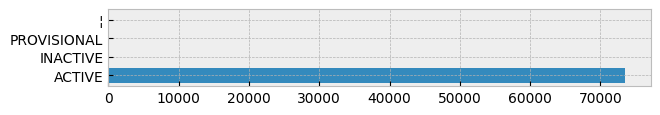

In [141]:
unique, counts = np.unique(df_new['Values'][12], return_counts=True)
plt.barh(unique,counts)
plt.rcParams["figure.figsize"] = (7,1)
print(np.asarray((unique, counts)).T)
plt.style.use('bmh')


In [142]:
#postCode
print(df_new['type'][13])
x = df_new['Values'][13]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

postCode
[['' 786]
 ['0' 9]
 ['0 0100' 1]
 ...
 ['ZE1 0PY' 1]
 ['ZE2 9QF' 1]
 ['ZTN 3000' 7]]


,Value,Count
0,,786
1,0,9
2,0 0100,1
3,00-004,1
4,00-082,1
...,...,...
18471,ZBR 2305,1
18472,ZE1 0PX,1
18473,ZE1 0PY,1
18474,ZE2 9QF,1


,Count
count,18476.000000
mean,1.988472
std,6.619545
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,786.000000


In [144]:
#countryCode
print(df_new['type'][14])
x = df_new['Values'][14]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)


countryCode
[['' 1]
 ['AE' 9]
 ['AL' 3]
 ['AM' 1]
 ['AN' 1]
 ['AR' 28]
 ['AT' 794]
 ['AU' 178]
 ['BA' 4]
 ['BB' 1]
 ['BD' 5]
 ['BE' 1051]
 ['BF' 1]
 ['BG' 413]
 ['BM' 2]
 ['BR' 34]
 ['BS' 1]
 ['BY' 2]
 ['CA' 212]
 ['CD' 2]
 ['CH' 456]
 ['CL' 2]
 ['CM' 2]
 ['CN' 821]
 ['CO' 1]
 ['CR' 1]
 ['CU' 1]
 ['CY' 233]
 ['CZ' 1347]
 ['DE' 4207]
 ['DK' 815]
 ['DZ' 1]
 ['EC' 1]
 ['EE' 115]
 ['EG' 15]
 ['ES' 1759]
 ['ET' 1]
 ['FI' 339]
 ['FR' 2191]
 ['GA' 1]
 ['GB' 7546]
 ['GE' 1]
 ['GH' 1]
 ['GR' 527]
 ['HK' 5]
 ['HR' 196]
 ['HU' 637]
 ['ID' 11]
 ['IE' 1079]
 ['IL' 99]
 ['IN' 922]
 ['IR' 3]
 ['IS' 49]
 ['IT' 1867]
 ['JM' 1]
 ['JO' 7]
 ['JP' 253]
 ['KE' 2]
 ['KP' 2]
 ['KR' 109]
 ['KY' 4]
 ['LB' 1]
 ['LI' 15]
 ['LT' 234]
 ['LU' 63]
 ['LV' 162]
 ['MA' 8]
 ['MC' 15]
 ['MD' 3]
 ['ME' 2]
 ['MK' 7]
 ['MO' 1]
 ['MT' 178]
 ['MU' 1]
 ['MW' 1]
 ['MX' 42]
 ['MY' 11]
 ['NG' 2]
 ['NL' 1409]
 ['NO' 390]
 ['NZ' 7]
 ['OM' 1]
 ['PE' 3]
 ['PH' 3]
 ['PK' 2]
 ['PL' 957]
 ['PR' 2]
 ['PT' 795]
 ['QA' 2]
 ['RO' 323]
 ['RS'

In [145]:
#Cleaning dirty data
x = df_new['Values'][14]
index = np.argwhere(x=='https://spor.ema.europa.eu/v1/locations/LOC-100031523')
df_new['Values'][14] = np.delete(df_new['Values'][14], index)
unique, counts = np.unique(df_new['Values'][14], return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Value,Count
0,,1
1,AE,9
2,AL,3
3,AM,1
4,AN,1
...,...,...
110,VN,5
111,YU,1
112,ZA,26
113,ZM,2


,Count
count,115.000000
mean,319.460870
std,901.434513
min,1.000000
25%,2.000000
50%,8.000000
75%,187.000000
max,7546.000000


In [146]:
#country
print(df_new['type'][15])
x = df_new['Values'][15]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)


country
[['32-744' 1]
 ['Albania' 3]
 ['Algeria' 1]
 ['Argentina' 28]
 ['Armenia' 1]
 ['Australia' 178]
 ['Austria' 794]
 ['Bahamas' 1]
 ['Bangladesh' 5]
 ['Barbados' 1]
 ['Belarus' 2]
 ['Belgium' 1051]
 ['Bermuda' 2]
 ['Bosnia and Herzegovina' 4]
 ['Brazil' 34]
 ['Bulgaria' 413]
 ['Burkina Faso' 1]
 ['Cameroon' 2]
 ['Canada' 212]
 ['Cayman Islands' 4]
 ['Chile' 2]
 ['China' 821]
 ['Colombia' 1]
 ['Congo, The Democratic Republic of the' 2]
 ['Costa Rica' 1]
 ['Croatia' 196]
 ['Cuba' 1]
 ['Cyprus' 233]
 ['Czechia' 1347]
 ['Denmark' 815]
 ['Ecuador' 1]
 ['Egypt' 15]
 ['Estonia' 115]
 ['Ethiopia' 1]
 ['Finland' 339]
 ['France' 2191]
 ['Gabon' 1]
 ['Georgia' 1]
 ['Germany' 4207]
 ['Ghana' 1]
 ['Greece' 527]
 ['Hong Kong' 5]
 ['Hungary' 637]
 ['Iceland' 49]
 ['India' 922]
 ['Indonesia' 11]
 ['Iran, Islamic Republic of' 3]
 ['Ireland' 1079]
 ['Israel' 99]
 ['Italy' 1867]
 ['Jamaica' 1]
 ['Japan' 253]
 ['Jordan' 7]
 ['Kenya' 2]
 ["Korea, Democratic People's Republic of" 2]
 ['Korea, Republic 

In [147]:
#Cleaning dirty data
x = df_new['Values'][15]
index = np.argwhere(x=='32-744')
df_new['Values'][15] = np.delete(df_new['Values'][15], index)
unique, counts = np.unique(df_new['Values'][15], return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Value,Count
0,Albania,3
1,Algeria,1
2,Argentina,28
3,Armenia,1
4,Australia,178
...,...,...
110,Vietnam,5
111,Y,1
112,Yugoslavia,1
113,Zambia,2


,Count
count,115.000000
mean,319.460870
std,901.434513
min,1.000000
25%,2.000000
50%,8.000000
75%,187.000000
max,7546.000000


In [148]:
#gpsLocation
print(df_new['type'][16])
x = df_new['Values'][16]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)


gpsLocation
[['' 9114]
 [',' 1]
 ['-12.025799, -77.131887' 1]
 ...
 ['69.681256, 18.986787' 1]
 ['69.684022, 18.985929' 1]
 ['PL' 1]]


In [151]:
#Cleaning dirty data
x = df_new['Values'][16]
index = np.argwhere(x==',')
y = np.delete(df_new['Values'][16], index)
index1 = np.argwhere(y=='PL')
df_new['Values'][16] = np.delete(y, index1)
unique, counts = np.unique(df_new['Values'][16], return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Value,Count
0,,9114
1,"-12.025799, -77.131887",1
2,"-12.086393, -77.050374",1
3,"-12.632795, -38.3247",1
4,"-14.301120, 29.116674",1
...,...,...
22319,"69.648364, 18.958835",1
22320,"69.650455, 18.958253",1
22321,"69.674239, 18.978171",1
22322,"69.681256, 18.986787",1


,Count
count,22324.000000
mean,1.645583
std,60.997943
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9114.000000


In [152]:
#languageCode
print(df_new['type'][17])
x = df_new['Values'][17]
unique, counts = np.unique(x, return_counts=True)
print(np.asarray((unique, counts)).T)

languageCode
[['' 33663]
 [' Ινστιτούτο Πυρηνικών & Ραδιολογικών Επιστημών' 1]
 ['BG' 114]
 ['BG¦' 1]
 ['BG¦EN' 5]
 ['CA' 1]
 ['CS' 9]
 ['CS¦CS' 2]
 ['DA' 26]
 ['DA¦DA' 2]
 ['DE' 112]
 ['DE¦' 1]
 ['DE¦DE' 13]
 ['DE¦EN' 1]
 ['EL' 136]
 ['EL¦' 4]
 ['EL¦EL' 15]
 ['EL¦EL¦EL' 2]
 ['EL¦EL¦EL¦EN' 2]
 ['EL¦EN' 3]
 ['EL¦LA' 1]
 ['EL¦¦' 4]
 ['EN' 16466]
 ['EN¦' 243]
 ['EN¦AF' 11]
 ['EN¦AR' 5]
 ['EN¦BE' 1]
 ['EN¦BG' 211]
 ['EN¦BG¦BG¦BG' 1]
 ['EN¦CA' 1]
 ['EN¦CS' 992]
 ['EN¦CS¦' 14]
 ['EN¦CS¦CS' 3]
 ['EN¦CS¦CS¦¦' 1]
 ['EN¦CS¦¦' 1]
 ['EN¦CS¦¦¦' 2]
 ['EN¦CS¦¦¦¦CS¦' 1]
 ['EN¦DA' 765]
 ['EN¦DA¦' 1]
 ['EN¦DA¦DA' 5]
 ['EN¦DE' 4554]
 ['EN¦DE¦DE' 565]
 ['EN¦DE¦DE¦DE' 42]
 ['EN¦DE¦DE¦DE¦DE' 7]
 ['EN¦DE¦DE¦DE¦DE¦DE¦DE' 1]
 ['EN¦EL' 237]
 ['EN¦EL¦' 1]
 ['EN¦EL¦EL' 200]
 ['EN¦EL¦EL¦' 1]
 ['EN¦EL¦EL¦EL' 77]
 ['EN¦EL¦EL¦EL¦EL' 12]
 ['EN¦EL¦EL¦EL¦EL¦EL' 2]
 ['EN¦EL¦EL¦¦EL' 1]
 ['EN¦EL¦¦EL' 1]
 ['EN¦EN' 46]
 ['EN¦EN¦EN' 20]
 ['EN¦EN¦EN¦EN¦EN' 1]
 ['EN¦EN¦EN¦EN¦EN¦EN' 1]
 ['EN¦ES' 1379]
 ['EN¦ES¦' 5]
 ['EN¦ES¦ES' 

In [171]:
arr = df_new['Values'][17]
print(len(arr))
torem = ['¦','¦¦','¦¦EL','¦¦NL','¦¦¦','¦¦¦¦','¦¦¦¦¦','¦¦¦¦¦¦','EN¦¦¦','EN¦¦¦CS','EN¦¦¦¦','EN¦¦¦¦¦','EN¦¦¦¦¦CS',
         'EN¦¦¦¦¦HI¦¦¦','EN¦CS¦¦¦¦CS¦','EN¦¦¦¦¦HI¦¦¦','EN¦¦¦¦¦¦HI','EN¦¦¦¦¦¦¦¦¦','EN¦¦¦¦¦¦¦¦¦¦¦','European Inspections Database¦European Inspections Database',
         ' Ινστιτούτο Πυρηνικών & Ραδιολογικών Επιστημών','NL¦¦¦¦¦','EN¦¦CS¦¦¦','¦EL¦¦¦','EN¦¦HI¦¦¦¦','¦EL¦¦','¦LA¦¦']
arr = arr[ ~np.isin(arr, torem) ]
print(len(arr))

73478
73243


In [173]:
#languagecode
# print(df_new['type'][17])
df_new['Values'][17] = arr
unique, counts = np.unique(arr, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

[['' 33663]
 ['BG' 114]
 ['BG¦' 1]
 ['BG¦EN' 5]
 ['CA' 1]
 ['CS' 9]
 ['CS¦CS' 2]
 ['DA' 26]
 ['DA¦DA' 2]
 ['DE' 112]
 ['DE¦' 1]
 ['DE¦DE' 13]
 ['DE¦EN' 1]
 ['EL' 136]
 ['EL¦' 4]
 ['EL¦EL' 15]
 ['EL¦EL¦EL' 2]
 ['EL¦EL¦EL¦EN' 2]
 ['EL¦EN' 3]
 ['EL¦LA' 1]
 ['EL¦¦' 4]
 ['EN' 16466]
 ['EN¦' 243]
 ['EN¦AF' 11]
 ['EN¦AR' 5]
 ['EN¦BE' 1]
 ['EN¦BG' 211]
 ['EN¦BG¦BG¦BG' 1]
 ['EN¦CA' 1]
 ['EN¦CS' 992]
 ['EN¦CS¦' 14]
 ['EN¦CS¦CS' 3]
 ['EN¦CS¦CS¦¦' 1]
 ['EN¦CS¦¦' 1]
 ['EN¦CS¦¦¦' 2]
 ['EN¦DA' 765]
 ['EN¦DA¦' 1]
 ['EN¦DA¦DA' 5]
 ['EN¦DE' 4554]
 ['EN¦DE¦DE' 565]
 ['EN¦DE¦DE¦DE' 42]
 ['EN¦DE¦DE¦DE¦DE' 7]
 ['EN¦DE¦DE¦DE¦DE¦DE¦DE' 1]
 ['EN¦EL' 237]
 ['EN¦EL¦' 1]
 ['EN¦EL¦EL' 200]
 ['EN¦EL¦EL¦' 1]
 ['EN¦EL¦EL¦EL' 77]
 ['EN¦EL¦EL¦EL¦EL' 12]
 ['EN¦EL¦EL¦EL¦EL¦EL' 2]
 ['EN¦EL¦EL¦¦EL' 1]
 ['EN¦EL¦¦EL' 1]
 ['EN¦EN' 46]
 ['EN¦EN¦EN' 20]
 ['EN¦EN¦EN¦EN¦EN' 1]
 ['EN¦EN¦EN¦EN¦EN¦EN' 1]
 ['EN¦ES' 1379]
 ['EN¦ES¦' 5]
 ['EN¦ES¦ES' 72]
 ['EN¦ES¦ES¦ES' 9]
 ['EN¦ES¦ES¦ES¦ES' 1]
 ['EN¦ES¦ES¦ES¦ES¦ES' 2]
 ['EN¦ES¦¦ES' 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Value,Count
0,,33663
1,BG,114
2,BG¦,1
3,BG¦EN,5
4,CA,1
...,...,...
229,SR,1
230,SV,26
231,TR,8
232,UK,4


,Count
count,234.000000
mean,313.004274
std,2468.526536
min,1.000000
25%,1.000000
50%,3.000000
75%,26.000000
max,33663.000000


In [188]:
#City
print(df_new['type'][18])

x = df_new['Values'][18]
unique, counts = np.unique(x, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

city


,Value,Count
0,,189
1,'S-Gravenhage,1
2,'s Gravenwezel,1
3,'s-Gravenhage,22
4,'s-Heerenberg,1
...,...,...
8647,s-Gravenhage,1
8648,Černošice,1
8649,Ķekavas Novads,1
8650,Łapczyca,1


,Count
count,8652.000000
mean,4.246301
std,17.178515
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,975.000000


In [190]:
#State
print(df_new['type'][19])

x = df_new['Values'][19]
unique, counts = np.unique(x, return_counts=True)
# print(np.asarray((unique, counts)).T)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

state


,Value,Count
0,,30602
1,AL,8
2,AZ,10
3,Act,1
4,Andhra Pradesh,6
...,...,...
143,WI,22
144,WV,3
145,Wa,5
146,West Bengal,3


,Count
count,148.000000
mean,248.236486
std,2514.215149
min,1.000000
25%,1.000000
50%,6.000000
75%,30.250000
max,30602.000000


In [192]:
print(np.asarray((unique, counts)).T)


[['' 30602]
 ['AL' 8]
 ['AZ' 10]
 ['Act' 1]
 ['Andhra Pradesh' 6]
 ['Andra Pradesh' 1]
 ['Ap' 1]
 ['Baden-Wuerttemberg' 520]
 ['Baden-Wurttemberg' 1]
 ['Bavaria' 617]
 ['Bharuch' 1]
 ['Brandenburg' 141]
 ['Bremen' 4]
 ['Bucharest' 1]
 ['Burgenland' 10]
 ['CA' 418]
 ['CO' 29]
 ['CT' 26]
 ['Cdmx' 4]
 ['City Of Westminster' 1]
 ['Coahuila' 1]
 ['DC' 8]
 ['DE' 19]
 ['Dadra And Nagar Haveli' 2]
 ['Daman And Diu' 3]
 ['Delhi' 2]
 ['Df' 1]
 ['District Dhar' 1]
 ['District Pune' 1]
 ['District Raisen' 1]
 ['District Solan' 3]
 ['District Thane' 1]
 ['District Vadodara' 2]
 ['FL' 37]
 ['GA' 37]
 ['Goa' 7]
 ['Grad Zagreb' 1]
 ['Greece' 1]
 ['Groningen' 1]
 ['Gujarat' 23]
 ['HI' 1]
 ['Haryana' 1]
 ['Hassia' 65]
 ['Herault' 1]
 ['Hesse' 315]
 ['Himachal Pradesh' 5]
 ['IA' 13]
 ['IL' 60]
 ['IN' 43]
 ['KS' 10]
 ['KY' 13]
 ['Kaernten' 22]
 ['Karnataka' 9]
 ['Kauno Apskritis' 1]
 ['LA' 8]
 ['Lisboa' 2]
 ['Lower Saxony' 271]
 ['M.p.' 1]
 ['MA' 285]
 ['MD' 85]
 ['ME' 1]
 ['MI' 34]
 ['MN' 20]
 ['MO' 41]


In [201]:
#Region
print(df_new['type'][20])

x = df_new['Values'][20]
unique, counts = np.unique(x, return_counts=True)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

region


,Value,Count
0,,36738
1,Lapczyca,1


,Count
count,2.00000
mean,18369.50000
std,25976.98182
min,1.00000
25%,9185.25000
50%,18369.50000
75%,27553.75000
max,36738.00000


In [203]:
#County
print(df_new['type'][21])

x = df_new['Values'][21]
unique, counts = np.unique(x, return_counts=True)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

county


,Value,Count
0,,19821
1,( BG),1
2,( MI),1
3,( RG),1
4,( RM),1
...,...,...
1263,Zilinsky,1
1264,Zlinsky,9
1265,Zuid-Holland,247
1266,la,1


,Count
count,1268.000000
mean,28.973975
std,557.808004
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,19821.000000


In [204]:
print(np.asarray((unique, counts)).T)


[['' 19821]
 ['( BG)' 1]
 ['( MI)' 1]
 ...
 ['Zuid-Holland' 247]
 ['la' 1]
 ['mazowieckie' 1]]


In [206]:
print(np.asarray((unique, counts)).T)


[['' 3]
 [' Ενέργειας ' 1]
 ['2019-08-28T17:37:51.37+02:00' 2341]
 ...
 ['2020-07-15T18:51:46.222+02:00' 1]
 ['2020-07-15T19:00:04.876+02:00' 1]
 ['2020-07-15T19:00:05.017+02:00' 1]]


In [207]:
#versionTimestamp
print(df_new['type'][22])
arr = df_new['Values'][22]
print(len(arr))
torem = [' Ενέργειας ']
arr = arr[ ~np.isin(arr, torem) ]
print(len(arr))
unique, counts = np.unique(arr, return_counts=True)
data  = []
row = {'Value':unique, 'Count':counts}
data.append(row)
valueCountDf = pd.DataFrame(row, columns = ['Value', 'Count']) 
display(valueCountDf)
display(valueCountDf.describe())

versionTimestamp
73478
73477


,Value,Count
0,,3
1,2019-08-28T17:37:51.37+02:00,2341
2,2019-08-28T17:37:51.426+02:00,2486
3,2019-08-28T17:37:51.427+02:00,7354
4,2019-08-28T17:37:51.428+02:00,2134
...,...,...
27143,2020-07-15T17:14:18.194+02:00,1
27144,2020-07-15T18:51:46.001+02:00,2
27145,2020-07-15T18:51:46.222+02:00,1
27146,2020-07-15T19:00:04.876+02:00,1


,Count
count,27148.000000
mean,2.706535
std,66.966862
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7354.000000


In [209]:
df_new.info

<bound method DataFrame.info of     UniqueId                                  type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
cleanedData = df_new.drop([20], axis=0)
cleanedData  = cleanedData.reset_index()
cleanedData = cleanedData.drop(['index'],axis=1)


In [212]:
cleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UniqueId  22 non-null     int64 
 1   type      22 non-null     object
 2   Values    22 non-null     object
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


# Full cleansed data of every semantics

In [213]:
cleanedData.info

<bound method DataFrame.info of     UniqueId                                  type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [222]:
Count = []
for i in range(22):
  Count.append(len(cleanedData['Values'][i]))
print(Count)

[36739, 36739, 36739, 36739, 36739, 36735, 36738, 36737, 36737, 73476, 73476, 73477, 73477, 36739, 36738, 36738, 36736, 73243, 36739, 36739, 36739, 73478]


In [223]:
cleanedData = cleanedData.assign(Count = Count) 
cleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UniqueId  22 non-null     int64 
 1   type      22 non-null     object
 2   Values    22 non-null     object
 3   Count     22 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 832.0+ bytes


In [236]:
cleanedData.to_parquet('drive/My Drive/fullCleansedDataBeforeSplit.gzip',compression='gzip')
